In [25]:
import numpy as np
import pandas as pd
import tensorflow.keras as tk
import tensorflow.keras.utils as np_utils
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [14]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
    
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

(60000, 28, 28)


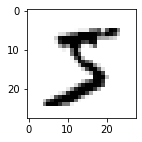

In [4]:
(xtrain, ytrain), (xtest, ytest) = tk.datasets.mnist.load_data()
print (xtrain.shape)
plot_image(xtrain[0])

# data preprocessing

In [5]:
x_Train=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],xtrain.shape[2], 1).astype('float32')
x_Test=xtest.reshape(xtest.shape[0],xtest.shape[1],xtest.shape[2], 1).astype('float32')
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255
y_TrainOneHot=np_utils.to_categorical(ytrain)
y_TestOneHot=np_utils.to_categorical(ytest)

In [6]:
# 建立模型
model = Sequential()
# 建立輸入層和隱藏層
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1), activation='relu'))
# 定義隱藏層神經元個數256
# 輸入為28*28=784 個float 數字
# 使用 normal distribution 常態分布的亂數，初始化 weight權重 bias 偏差
# 定義激活函數為 relu

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# 建立輸出層
model.add(Dense(10,activation='softmax'))
# 定義輸出層為10個 (數字0~9)
# 也是使用常態分佈初始化
# 定義激活函數是 softmax
# 這裡建立的Dense 層，不用設定 input dim ，因為keras 會自動照上一層的256設定

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

2022-07-06 22:38:09.717613: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-06 22:38:09.718010: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-06 22:38:09.720647: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=300, verbose=2)

2022-07-06 22:38:09.972612: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-06 22:38:09.993820: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3200000000 Hz


Epoch 1/20
160/160 - 13s - loss: 0.4717 - accuracy: 0.8506 - val_loss: 0.0978 - val_accuracy: 0.9697
Epoch 2/20
160/160 - 13s - loss: 0.1352 - accuracy: 0.9594 - val_loss: 0.0661 - val_accuracy: 0.9804
Epoch 3/20
160/160 - 12s - loss: 0.0981 - accuracy: 0.9700 - val_loss: 0.0525 - val_accuracy: 0.9837
Epoch 4/20
160/160 - 12s - loss: 0.0789 - accuracy: 0.9761 - val_loss: 0.0420 - val_accuracy: 0.9887
Epoch 5/20
160/160 - 12s - loss: 0.0678 - accuracy: 0.9794 - val_loss: 0.0402 - val_accuracy: 0.9885
Epoch 6/20
160/160 - 12s - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.0375 - val_accuracy: 0.9900
Epoch 7/20
160/160 - 11s - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0343 - val_accuracy: 0.9912
Epoch 8/20
160/160 - 12s - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0331 - val_accuracy: 0.9911
Epoch 9/20
160/160 - 11s - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0304 - val_accuracy: 0.9921
Epoch 10/20
160/160 - 13s - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0318 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


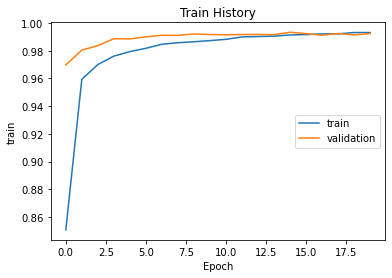

In [8]:
print (train_history.history.keys())
show_train_history(train_history, 'accuracy', 'val_accuracy')

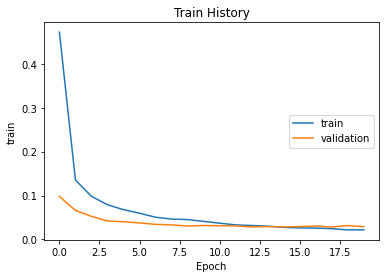

In [10]:
show_train_history(train_history, 'loss','val_loss')

# Score and evaluation

In [12]:
scores = model.evaluate(x_Test_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 10s 30ms/step - loss: 0.0208 - accuracy: 0.9940


0.9940000176429749

# Predictions

[7 2 1 0 4 1 4 9 5 9]


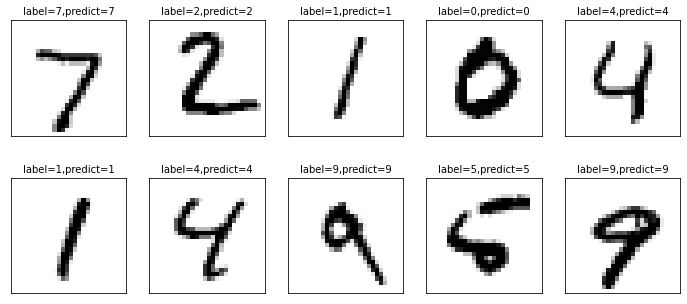

In [16]:
prediction=model.predict_classes(x_Test_normalize)
print (prediction[:10])
plot_images_labels_prediction(xtest,ytest,prediction,idx=0)

# Confusion matrix

predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        978     0     0     1    0    0    0     0    1    0
1          0  1133     0     0    0    1    0     1    0    0
2          1     0  1027     0    0    0    0     2    2    0
3          0     0     0  1006    0    3    0     0    1    0
4          0     0     0     0  981    0    0     0    0    1
5          1     0     0     3    0  887    1     0    0    0
6          3     2     0     0    1    1  950     0    1    0
7          0     2     5     0    2    0    0  1016    1    2
8          1     0     1     1    0    1    1     0  967    2
9          2     0     0     0    8    3    0     1    0  995
      label  predict
1393      5        3
2597      5        3
5937      5        3
Int64Index([1393, 2597, 5937], dtype='int64')


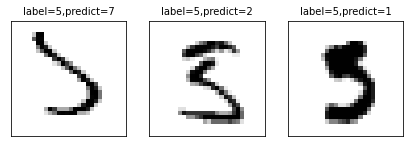

In [22]:
print (pd.crosstab(ytest,prediction,rownames=['label'],colnames=['predict']))
df = pd.DataFrame({'label':ytest, 'predict':prediction})
print (df[(df.label==5)&(df.predict==3)])
print (df[(df.label==5)&(df.predict==3)].index)
plot_images_labels_prediction([xtest[i] for i in df[(df.label==5)&(df.predict==3)].index],[ytest[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0,num=min(len(df[(df.label==5)&(df.predict==3)]),10))
